In [1]:
% load_ext autoreload
% autoreload 2

UsageError: Line magic function `%` not found.


In [2]:
import sys

sys.path.append('/home/labs/amit/noamsh/repos/sc_clustering')

In [3]:
from pathlib import Path
import scanpy as sc
import shutil

import config
from embedding.load_hierarchically_trained_scvi import load_adatas_from_experiment

In [4]:
experiment_name = "hierarchical_scvi_2021_12_19__15_43_40"
results_dir = Path(config.RESULTS_DIR, experiment_name)

copy_results_to_dir = False
if copy_results_to_dir:
    source_labeled_adata_path = Path(config.ASAF_META_CELL_ATLAS_DIR_PATH, "scanpy_metacells.h5ad")
    new_labeled_adata_path = Path(results_dir, "scanpy_metacells.h5ad")
    shutil.copyfile(new_labeled_adata_path, new_labeled_adata_path)


In [5]:
full_adata, clusters_adatas, embedding_col_names = load_adatas_from_experiment(experiment_name)

full_adata

In [6]:
sc.pp.neighbors(full_adata, use_rep=embedding_col_names["full"])

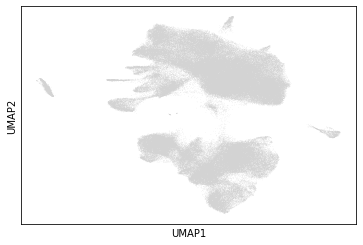

In [7]:
sc.tl.umap(full_adata, min_dist=0.3)
sc.pl.umap(full_adata)

cluster 0

In [8]:
cluster_name = "cluster_0"
cluster_0_adata = clusters_adatas[cluster_name]
sc.pp.neighbors(cluster_0_adata, use_rep=embedding_col_names[cluster_name])

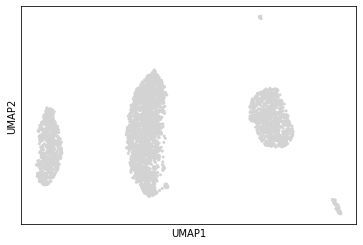

In [9]:
sc.tl.umap(cluster_0_adata, min_dist=0.3)
sc.pl.umap(cluster_0_adata)

cluster 1

In [10]:
cluster_name = "cluster_1"
cluster_1_adata = clusters_adatas[cluster_name]
sc.pp.neighbors(cluster_1_adata, use_rep=embedding_col_names[cluster_name], n_neighbors=10)
sc.tl.umap(cluster_1_adata, min_dist=0.3)

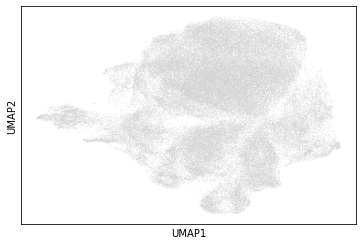

In [11]:
sc.pl.umap(cluster_1_adata)

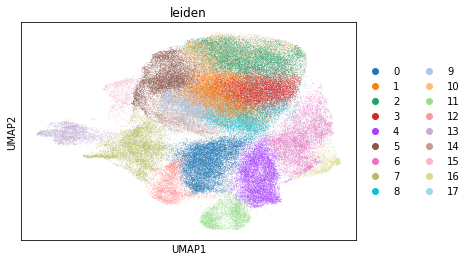

In [12]:
sc.tl.leiden(cluster_1_adata, resolution=0.8)
sc.pl.umap(cluster_1_adata, color=["leiden"])


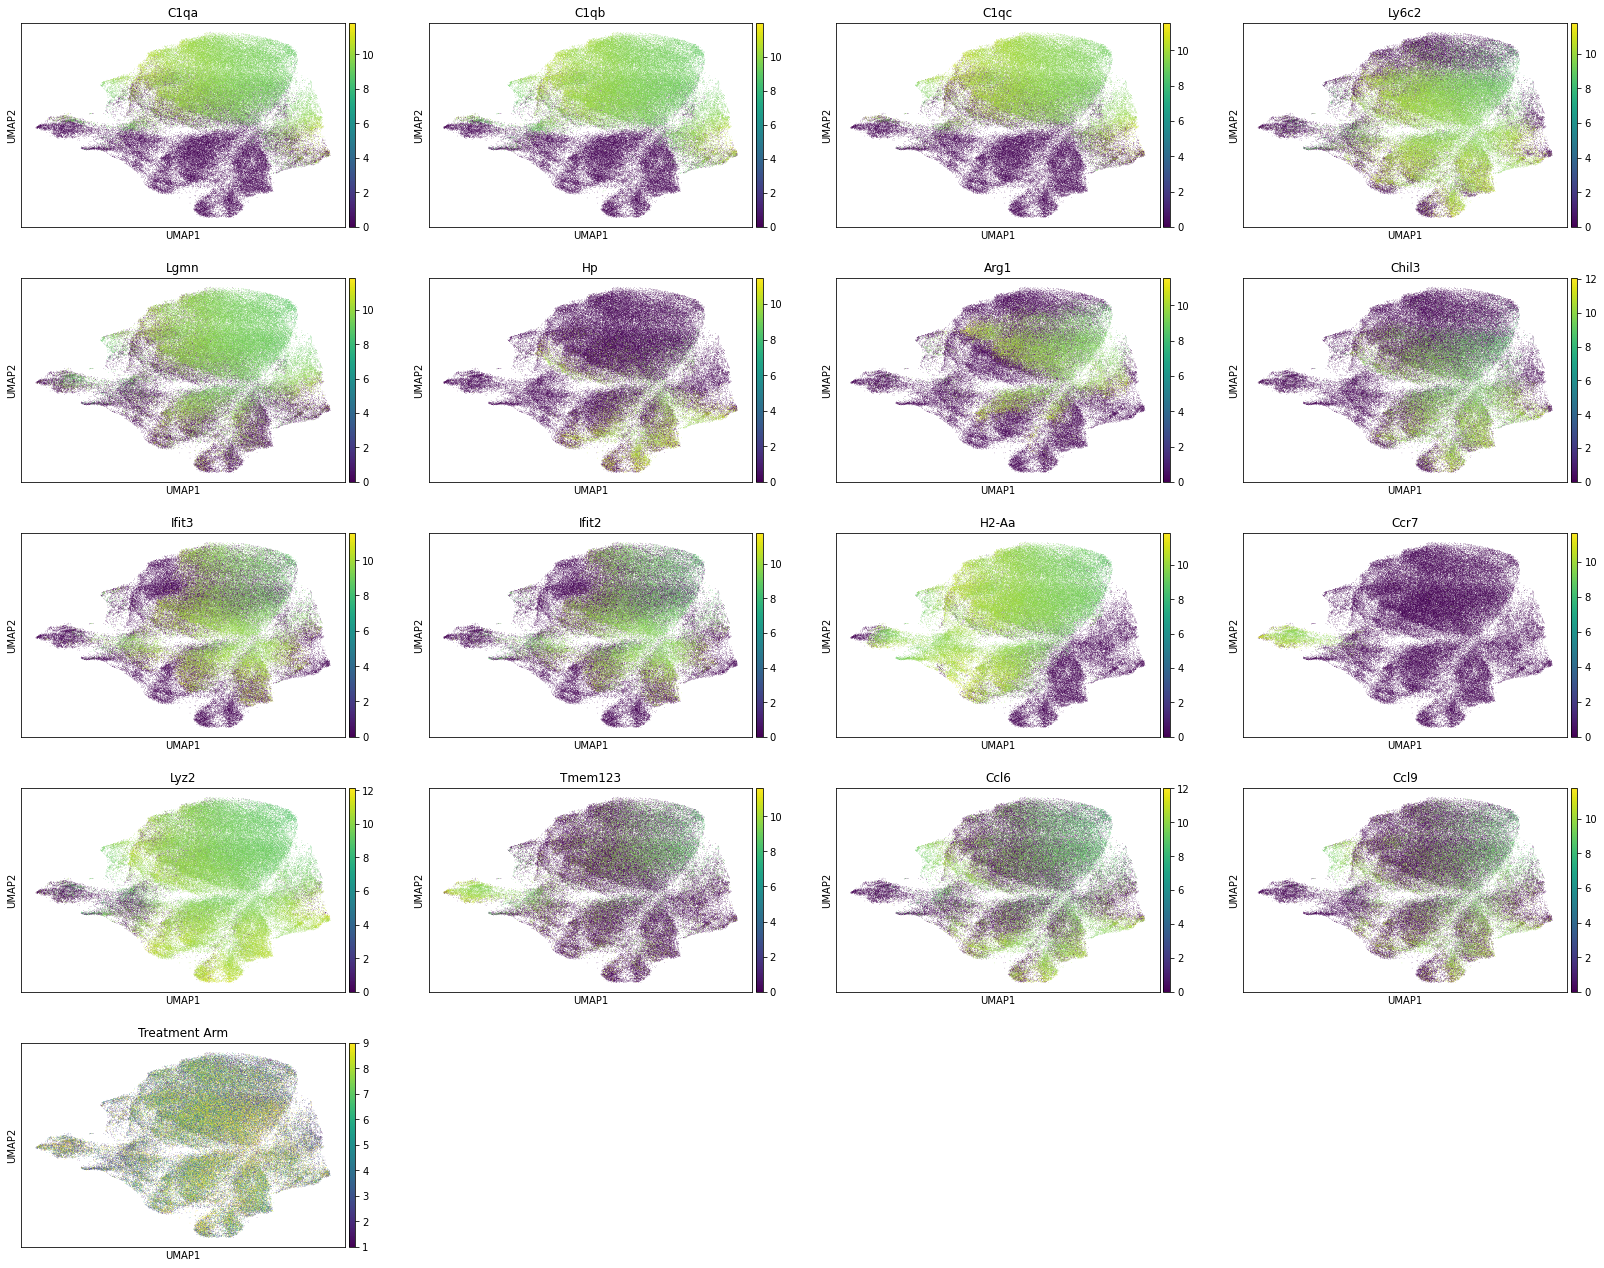

In [29]:
from data.meta_data_columns_names import TREATMENT_ARM

# sc.pl.umap(cluster_1_adata, color=["Plac8", "Cxcl10", "C1qb", "Cd63", "Arg1", "Nkg7", "Pf4", "Gpnmb"])
sc.pl.umap(cluster_1_adata, color=["C1qa", "C1qb", "C1qc",
                                   "Ly6c2", "Lgmn", "Hp", "Arg1", "Chil3", "Ifit3", "Ifit2",
                                   "H2-Aa",
                                   "Ccr7", "Lyz2", "Tmem123",
                                   "Ccl6", "Ccl9",
                                   TREATMENT_ARM])

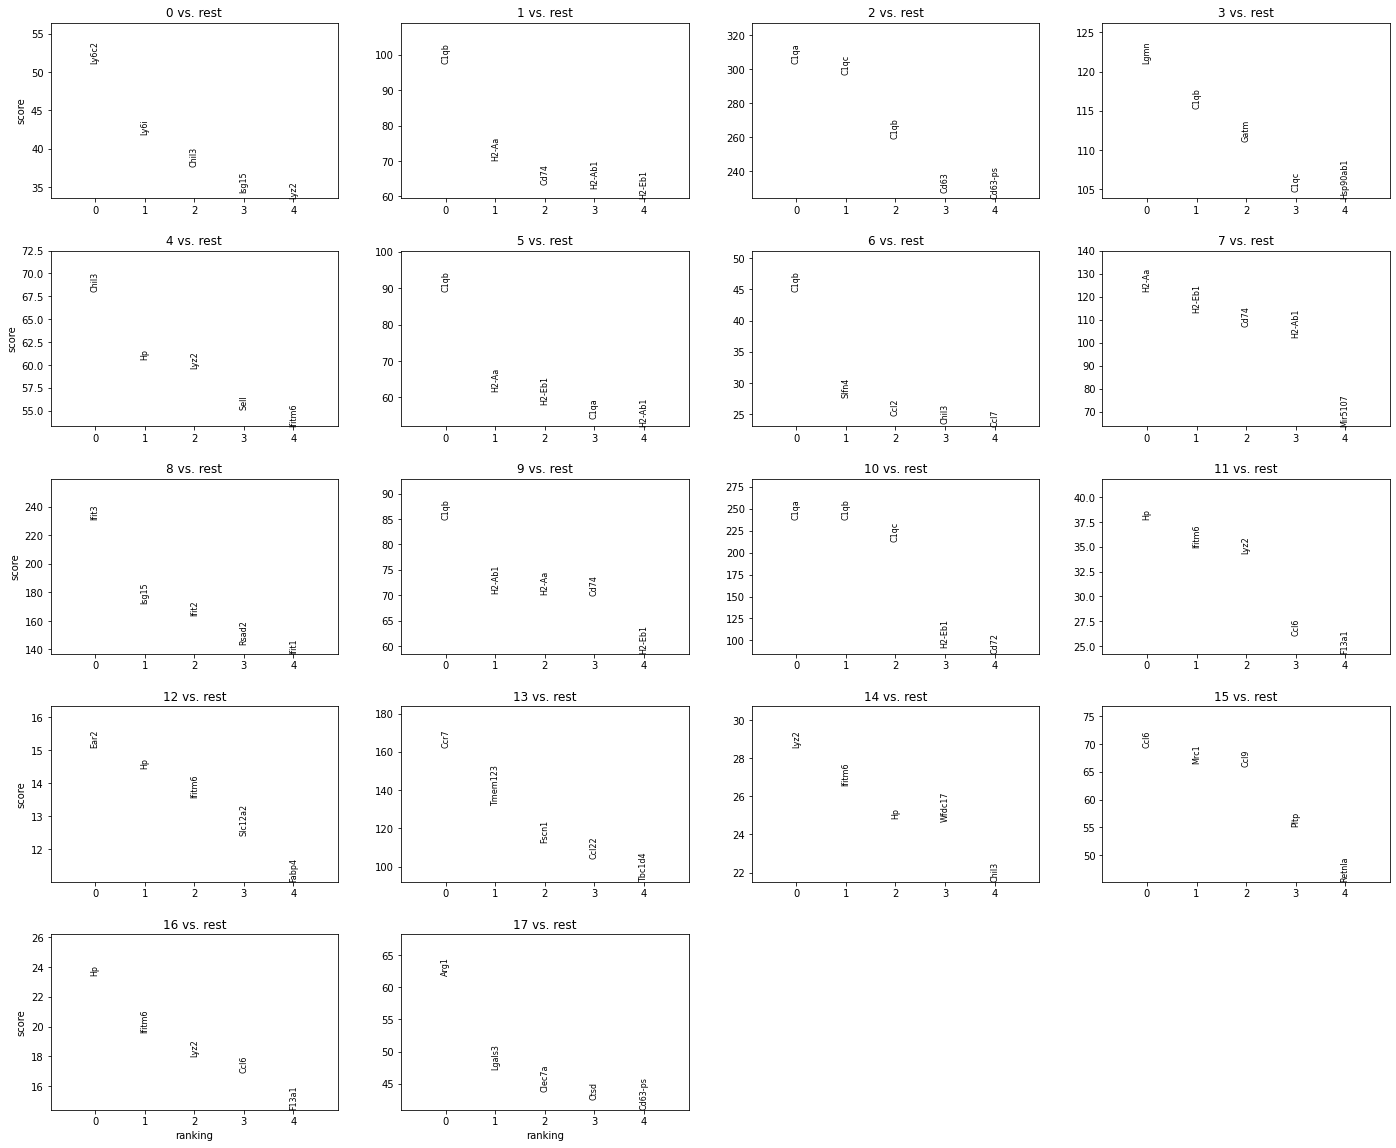

In [18]:
sc.tl.rank_genes_groups(cluster_1_adata, 'leiden', method='t-test')
sc.pl.rank_genes_groups(cluster_1_adata, n_genes=5, sharey=False)

cluster 2

In [23]:
cluster_name = "cluster_2"
cluster_2_adata = clusters_adatas[cluster_name]
sc.pp.neighbors(cluster_2_adata, use_rep=embedding_col_names[cluster_name], n_neighbors=10)
sc.tl.umap(cluster_2_adata, min_dist=0.3)

... storing 'metacell' as categorical
... storing 'mc_num' as categorical


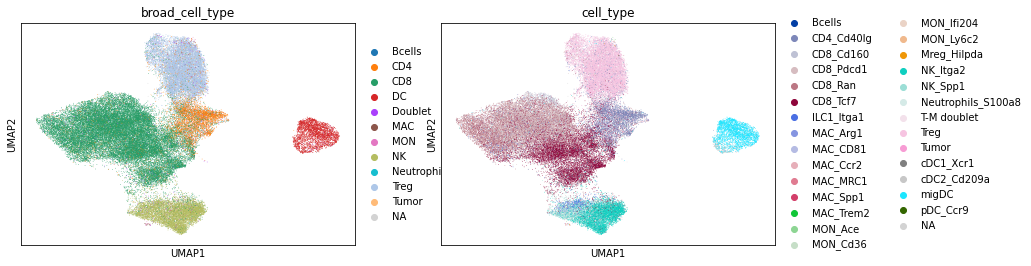

In [24]:
sc.pl.umap(cluster_2_adata)

cluster 3

In [25]:
cluster_name = "cluster_3"
cluster_3_adata = clusters_adatas[cluster_name]
sc.pp.neighbors(cluster_3_adata, use_rep=embedding_col_names[cluster_name], n_neighbors=10)
sc.tl.umap(cluster_3_adata, min_dist=0.3)

... storing 'metacell' as categorical
... storing 'mc_num' as categorical


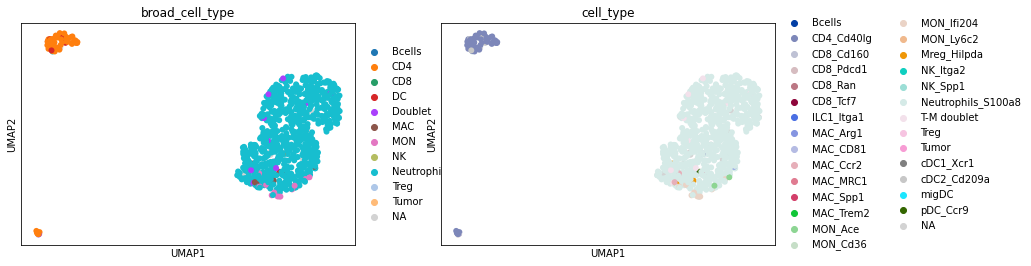

In [26]:
sc.pl.umap(cluster_3_adata)

